#Migliore Transient Sodium Channel# 
#Implementation of If... Else... Statement#
The comparison between the gate variable time course equations for the Transient Sodium channels Migliore et al. 2005 implemented in python with the NML2 conversion curves produced by pynml-channelanalysis are not quite matching: 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


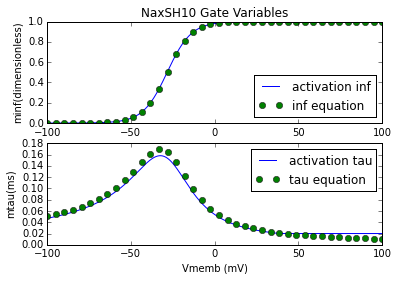

In [24]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('NaxSH10_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('NaxSH10_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('NaxSH10_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 40)
q10 = 2**((35-24)/10)
vhalf = -20
scale = 7.2
alpha = (2.880000018*((v-vhalf)/scale)/(1 - np.exp(-((v-vhalf)/scale))))
beta = (0.892800005*((v-vhalf)/-scale)/(1 - np.exp(-((v-vhalf)/-scale))))
tau = (1/(alpha + beta))
mtaueq = tau/q10
minf_fit = alpha/(alpha + beta)

#convert to physiological units
vm[1] = vm[1]*1000
mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('NaxSH10 Gate Variables')
#plt.legend(['activation inf'], loc='lower right')
plt.legend(['activation inf', 'inf equation'], loc='lower right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper right')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

Implementing the If... Else statement requires iteration through the Vm data points in a NumPY array and in this case required a large array to be constructed including alpha, beta, tau and a tautest variable with Vm being used as the index:

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


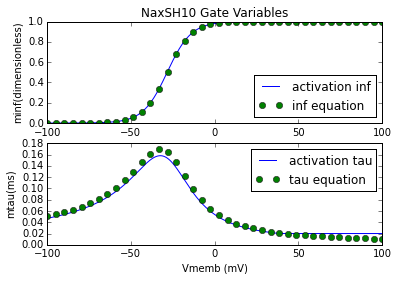

In [26]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('NaxSH10_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('NaxSH10_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('NaxSH10_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 40)
q10 = 2**((35-24)/10)
vhalf = -20
scale = 7.2
alpha = np.array(2.880000018*((v-vhalf)/scale)/(1 - np.exp(-((v-vhalf)/scale))))
beta = np.array(0.892800005*((v-vhalf)/-scale)/(1 - np.exp(-((v-vhalf)/-scale))))
tau = np.array(1/(alpha + beta))
testtau =np.array(1/((alpha + beta)*2.1435469250725863))
np.column_stack((v,alpha,beta,testtau))

for i, value in enumerate(v):
    if "testtau" < 0.02:
        tau[i] =  (0.02*2.1435469250725863) 
    else:
        tau[i] =  tau[i]
    
mtaueq = tau/q10
minf_fit = alpha/(alpha + beta)

#convert to physiological units
vm[1] = vm[1]*1000
mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('NaxSH10 Gate Variables')
#plt.legend(['activation inf'], loc='lower right')
plt.legend(['activation inf', 'inf equation'], loc='lower right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper right')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

Implementing the If... Else... statement produces no visible improvement of the match. So I looked at putting a calculated value in for Q10:

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


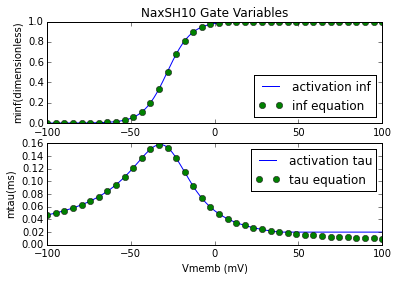

In [27]:
#load python packages
%pylab inline
import pandas as pd

#load data
minf = pd.read_csv('NaxSH10_ChannelML.m.inf.lems.35.dat', header=None, delim_whitespace=True)
mtau = pd.read_csv('NaxSH10_ChannelML.m.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('NaxSH10_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
v = np.linspace(-100, 100, 40)
q10 = 2.1435469250725863
vhalf = -20
scale = 7.2
alpha = np.array(2.880000018*((v-vhalf)/scale)/(1 - np.exp(-((v-vhalf)/scale))))
beta = np.array(0.892800005*((v-vhalf)/-scale)/(1 - np.exp(-((v-vhalf)/-scale))))
tau = np.array(1/(alpha + beta))
testtau =np.array(1/((alpha + beta)*2.1435469250725863))
np.column_stack((v,alpha,beta,testtau))

for i, value in enumerate(v):
    if "testtau" < 0.02:
        tau[i] =  (0.02*2.1435469250725863) 
    else:
        tau[i] =  tau[i]
    
mtaueq = tau/q10
minf_fit = alpha/(alpha + beta)

#convert to physiological units
vm[1] = vm[1]*1000
mtau[1] = mtau[1]*1000

#vm.head()
#plot Gate Variables
subplot(2,1,1)
plt.plot(vm[1], minf[1], v, minf_fit, 'o')
plt.ylabel('minf(dimensionless)')
plt.title('NaxSH10 Gate Variables')
#plt.legend(['activation inf'], loc='lower right')
plt.legend(['activation inf', 'inf equation'], loc='lower right')
subplot(2,1,2)
#plt.plot(vm[1], mtau[1])
plt.plot(vm[1], mtau[1], v, mtaueq, 'o')
plt.xlabel('Vmemb (mV)')
plt.ylabel('mtau(ms)')
#plt.legend(['activation tau'], loc='upper right')
plt.legend(['activation tau', 'tau equation'], loc='upper right')

The calculated value for Q10 does produce a good match at the peak of the curve but deteriorates at higher positive values of Vm. 